In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from copy import deepcopy

# set font and plot size to be larger
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 10)})

#import datasets
dt2012 = pd.read_csv("../Data/crdHT.csv", index_col=0)
dt2013 = pd.read_csv("../Data/crdHT_2013.csv", index_col=0)

In [2]:
#drop irrelevant columns from both datasets
dt2012.drop(['No. of cases withdrawn by the Govt. during investigation','Cases not investigated or in which investigation was refused','Cases declared false on account of mistake of fact or of law','Cases in which chargesheets were laid','Cases in which charge-sheets were not laid but final report submitted during the year','Total cases (Chargesheeted + Final Report submitted)','Cases pending investigation at the end of the year','Cases pending trial from the previous year','Cases sent for trial during the year','No. of cases withdrawn by the Govt.','Cases compounded or withdrawn'],axis=1,inplace=True)
dt2013.drop(['No. of cases withdrawn by the Govt. during investigation','Cases not investigated or in which investigation was refused','Cases declared false on account of mistake of fact or of law','Cases in which chargesheets were laid','Cases in which charge-sheets were not laid but final report submitted during the year','Total cases (Chargesheeted + Final Report submitted)','Cases pending investigation at the end of the year','Cases pending trial from the previous year','Cases sent for trial during the year','No. of cases withdrawn by the Govt.','Cases compounded or withdrawn'],axis=1,inplace=True)

#encode categorical data
cleanup_nums2013 = {"Crime Head":     {"Buying of Girls for Prostitution": 1, "Immoral Traffic (P) Act, 1956": 2,"Importation of girls from Foreign Countries": 3,"Procuration of Minor Girls": 4,"Selling of Girls for Prostitution": 5,"Human Trafficking": 6}}
cleanup_nums2012 = {"Crime Head":     {"IMMORAL TRAFFIC (PREVENTION) ACT": 1, "BUYING OF GIRLS FOR PROSTITUTION (SECTION 373 IPC)": 2, "SELLING OF GIRLS FOR PROSTITUTION (SECTION 372 IPC)": 3,"PROCURATION OF MINOR GIRLS (SECTION 366-A IPC)": 4, "IMPORTATION OF GIRLS FROM FOREIGN COUNTRY(SECTION 366-B IPC)": 5, "HUMAN TRAFFICKING": 6}}

#replace categorical data with respective numeric values
dt2012.replace(cleanup_nums2012, inplace=True)
dt2013.replace(cleanup_nums2013, inplace=True)

#drop irrelevant rows
dt2013.drop(['Total (State)','Total (UTs)','Total (All-India)'], inplace = True)
dt2012.drop(['TOTAL (STATES)','TOTAL (UTs)','TOTAL (ALL-INDIA)'], inplace = True)

#print dataset's shape
print(dt2013.shape)
print(dt2012.shape)

(210, 8)
(210, 8)


<bound method NDFrame.head of                          PCA1       PCA2       PCA3       PCA4      PCA5  \
STATE/UT                                                                   
Andhra Pradesh    -205.497407 -17.449458   1.842978   3.278969  1.125874   
Arunachal Pradesh -205.497407 -17.449458   1.842978   3.278969  1.125874   
Assam             -205.497407 -17.449458   1.842978   3.278969  1.125874   
Bihar             -202.588561 -17.738036   2.383403   3.614213  1.351442   
Chhattisgarh      -205.497407 -17.449458   1.842978   3.278969  1.125874   
...                       ...        ...        ...        ...       ...   
D&N Haveli        -187.799828 -17.746813  -0.263073   2.127073  0.893677   
Daman & Diu       -166.259559 -17.973982   5.930436   2.406857  0.167645   
Delhi UT           353.960040 -42.636577 -34.774126  32.804969  6.600473   
Lakshadweep       -205.495857 -17.441183   1.849314   3.246164  1.099449   
Puducherry        -186.727235 -17.737300   2.013557   6.62

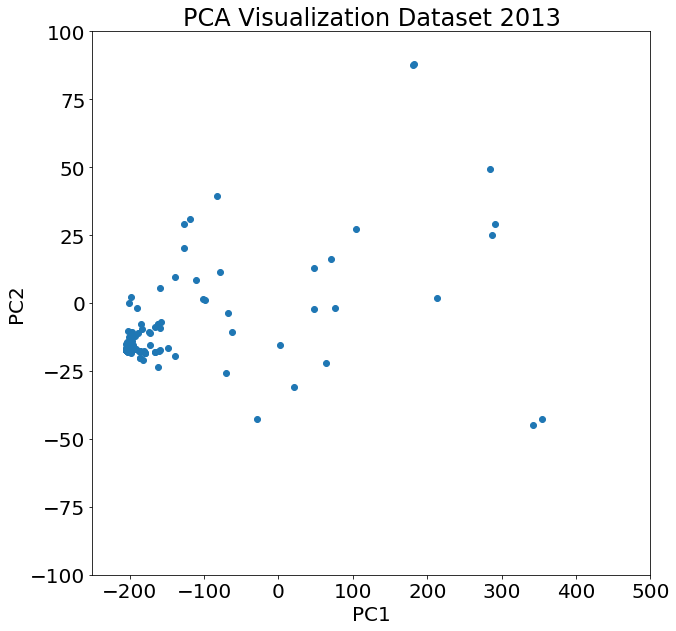

In [10]:
# Run The PCA for 2013 dataset
pca = PCA(n_components=7)
pca.fit(dt2013)
 
# Store results of PCA in a data frame
result2013=pd.DataFrame(pca.transform(dt2013), columns=['PCA%i' % i for i in range(1,8)], index=dt2013.index)

#print PCA values
print(result2013.head)

#initialize plot
fig = plt.figure()
#show a scatter plot
plt.scatter(result2013['PCA1'], result2013['PCA2'])
# label the axes and titles
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axis([-250,500,-100,100])
plt.title("PCA Visualization Dataset 2013")
plt.show()

<bound method NDFrame.head of                           PCA1        PCA2       PCA3        PCA4       PCA5  \
STATE/UT                                                                       
ANDHRA PRADESH     1705.132810  730.390173 -40.647394 -131.786351 -18.217757   
ARUNACHAL PRADESH  -187.965338  -15.517037  -1.827863   -2.350395  -1.089485   
ASSAM               -59.148788   -9.661550  29.551495  -10.673403   1.551282   
BIHAR                21.601020  -10.365397  11.153944   -3.894394   2.289671   
CHHATTISGARH       -126.921963   -0.685049 -13.573554   -4.882650 -14.248376   
...                        ...         ...        ...         ...        ...   
D & N HAVELI       -173.855805  -17.014426  -2.494585   -1.888911  -0.811724   
DAMAN & DIU        -156.554062  -18.088314   2.769018   -6.381239  -1.586452   
DELHI               396.362711  -28.969320 -45.054855  -11.523016 -26.688881   
LAKSHADWEEP        -189.472566  -15.796993  -2.119338   -3.058020  -1.167550   
PUDUCHERRY

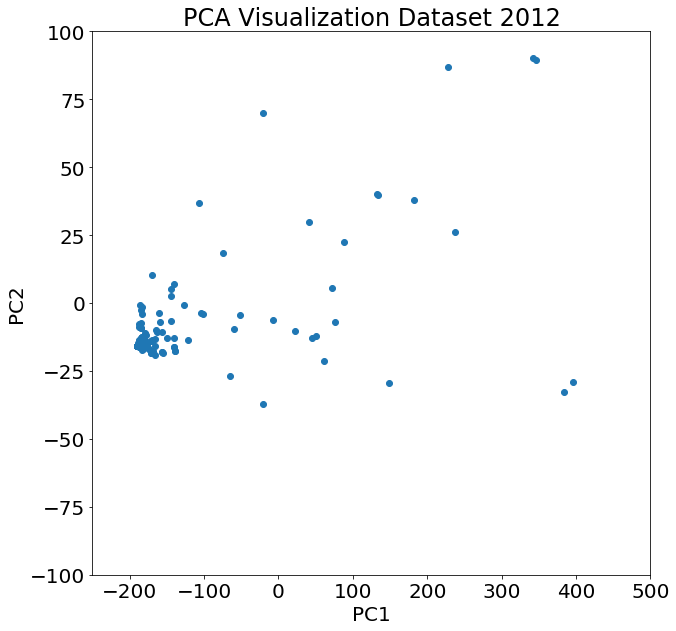

In [11]:
# Run The PCA
pca1 = PCA(n_components=7)
pca1.fit(dt2012)
 
# Store results of PCA in a data frame
result2012=pd.DataFrame(pca1.transform(dt2012), columns=['PCA%i' % i for i in range(1,8)], index=dt2012.index)

#print PCA values
print(result2012.head)

#initialize plot
fig = plt.figure()
#show a scatter plot   
plt.scatter(result2012['PCA1'], result2012['PCA2'])
# label the axes and titles
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axis([-250,500,-100,100])   
plt.title("PCA Visualization Dataset 2012")
plt.show()

In [12]:
# Euclidean Distance Calculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [17]:
#K Means Clustering Algorithm
#f1 and f2 are clustering data points
#z is number of clusters

def kmeans(z,f1,f2):
    k = z
    # X coordinates of random centroids
    C_x = np.random.randint(0, np.max(X)-20, size=k)
    # Y coordinates of random centroids
    C_y = np.random.randint(0, np.max(X)-20, size=k)
    
    C = np.array(list(zip(C_x, C_y)), dtype=np.int32)
    print("Initial Centroids")
    print(C)

    # Plotting along with the Centroids
    plt.scatter(f1, f2, c='#050505', s=7)
    plt.scatter(C_x, C_y, marker='*', s=200, c='g')

    # To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
    
    # Cluster Lables(0, 1, 2,..)
    clusters = np.zeros(len(X))
    
    # Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old, None)
    
    # Loop will run till the error becomes zero
    while error != 0:
        # Assigning each value to its closest cluster
        for i in range(len(X)):
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # Storing the old centroid values
        C_old = deepcopy(C)
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)

    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()
    for i in range(k):
            points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
            ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

Initial Centroids
[[1687  260]
 [  66 1217]
 [3852 2831]]


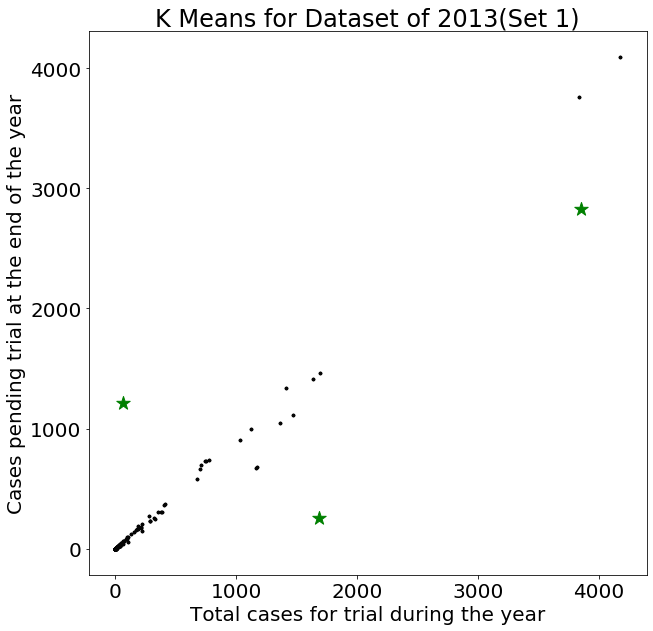

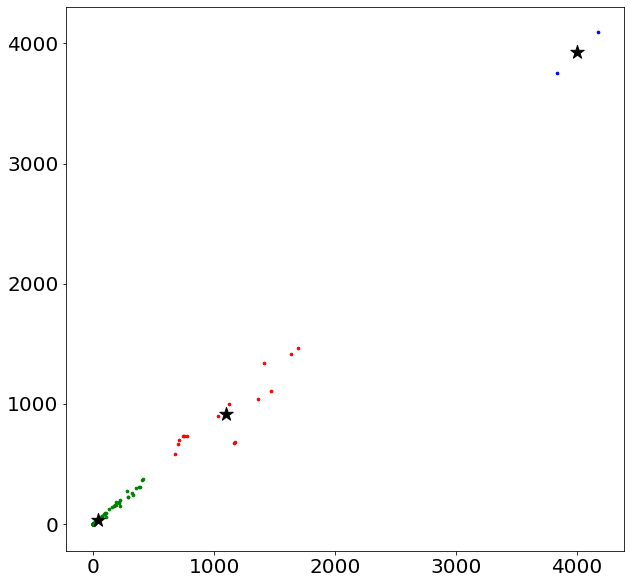

In [18]:
#Set 1
# Getting the data points and plotting it
f1=dt2013['Total cases for trial during the year'].values
f2=dt2013['Cases pending trial at the end of the year'].values
X = np.array(list(zip(f1, f2)))
#show scatter plot and add labels and title
plt.scatter(f1, f2, c='black', s=7)
plt.xlabel("Total cases for trial during the year")
plt.ylabel("Cases pending trial at the end of the year")  
plt.title("K Means for Dataset of 2013(Set 1)")

#K-Means for a subset of Dataset 2013
kmeans(3,f1,f2)

Initial Centroids
[[1737 2976]
 [1520 1698]
 [ 691 2142]]


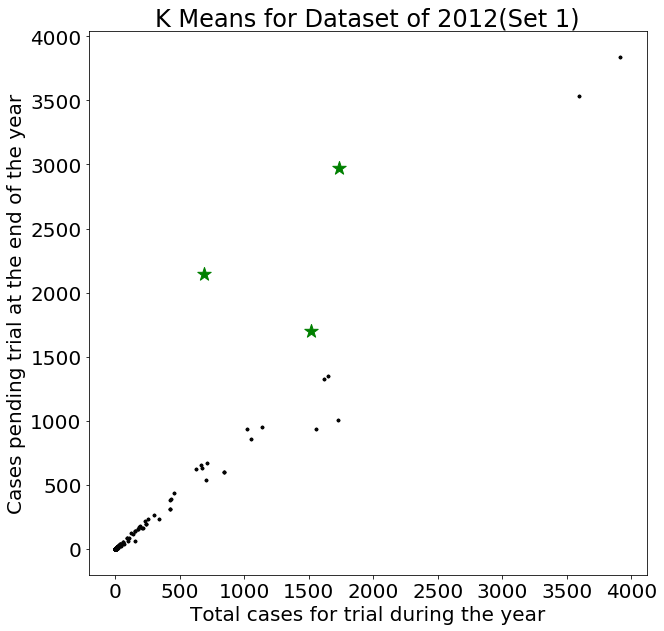

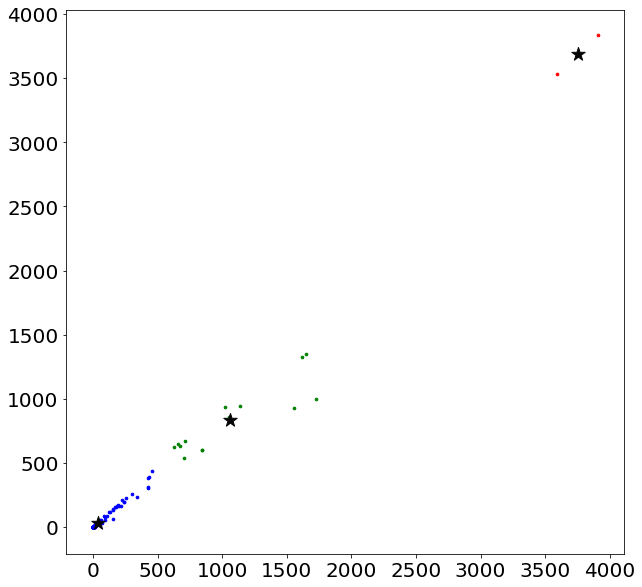

In [23]:
#Set 1
# Getting the data points and plotting it
f1=dt2012['Total cases for trial during the year'].values
f2=dt2012['Cases pending trial at the end of the year'].values
X = np.array(list(zip(f1, f2)))
#show scatter plot and add labels and title
plt.scatter(f1, f2, c='black', s=7)
plt.xlabel("Total cases for trial during the year")
plt.ylabel("Cases pending trial at the end of the year")  
plt.title("K Means for Dataset of 2012(Set 1)")

#K-Means for a subset of Dataset 2012
kmeans(3,f1,f2)

Initial Centroids
[[ 65 108]
 [103  16]
 [204 200]]


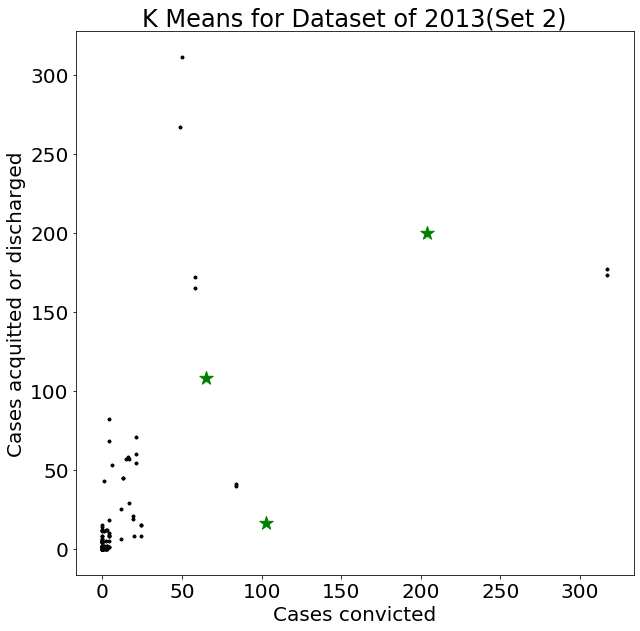

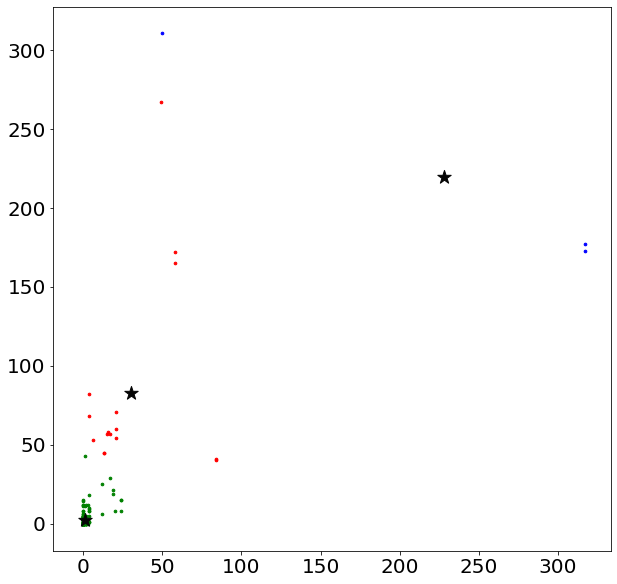

In [26]:
#Set 2
# Getting the data points and plotting it
f1=dt2013['Cases convicted'].values
f2=dt2013['Cases acquitted or discharged'].values
X = np.array(list(zip(f1, f2)))
#show scatter plot and add labels and title
plt.scatter(f1, f2, c='black', s=7)
plt.xlabel("Cases convicted")
plt.ylabel("Cases acquitted or discharged")  
plt.title("K Means for Dataset of 2013(Set 2)")

#K-Means for a subset of Dataset 2013
kmeans(3,f1,f2)

Initial Centroids
[[124  97]
 [426 430]
 [ 62  34]]


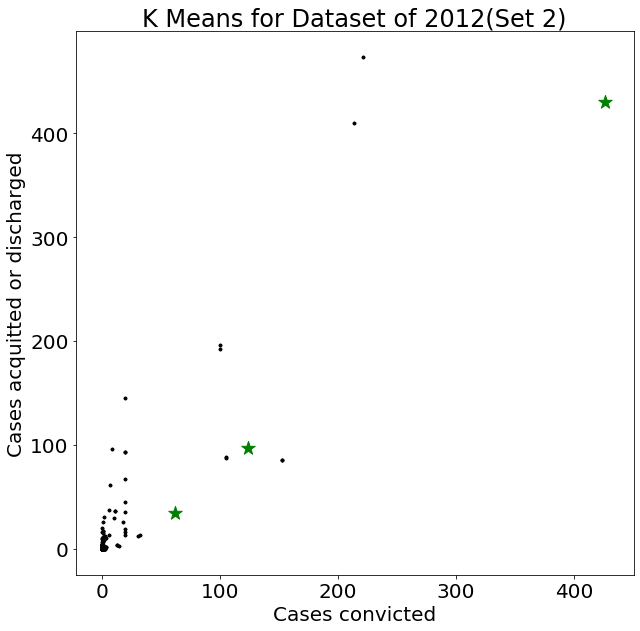

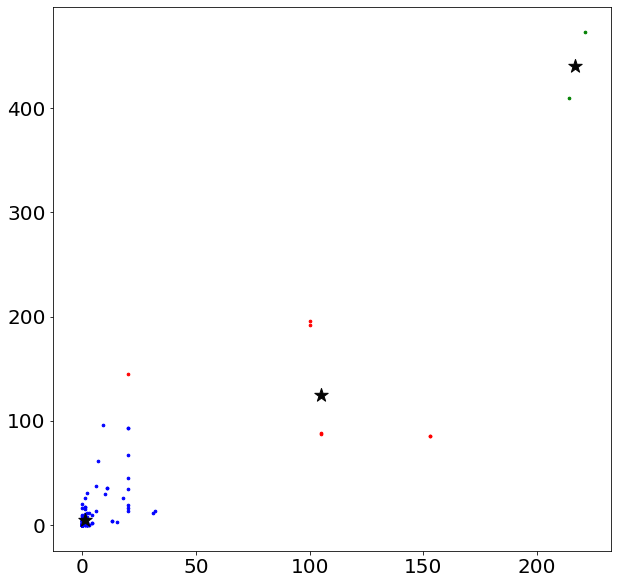

In [29]:
#Set 2
# Getting the data points and plotting it
f1=dt2012['Cases convicted'].values
f2=dt2012['Cases acquitted or discharged'].values
X = np.array(list(zip(f1, f2)))
#show scatter plot and add labels and title
plt.scatter(f1, f2, c='black', s=7)
plt.xlabel("Cases convicted")
plt.ylabel("Cases acquitted or discharged")  
plt.title("K Means for Dataset of 2012(Set 2)")

#K-Means for a subset of Dataset 2012
kmeans(3,f1,f2)

Initial Centroids
[[1386  494]
 [1459  171]
 [ 638  291]]


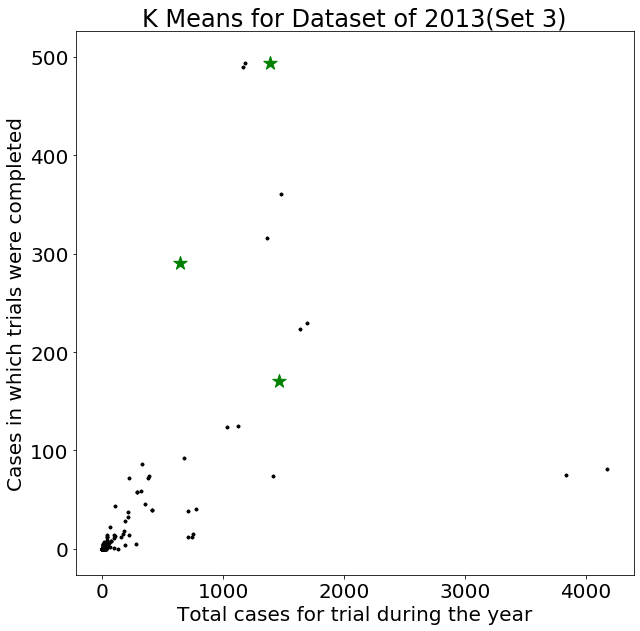

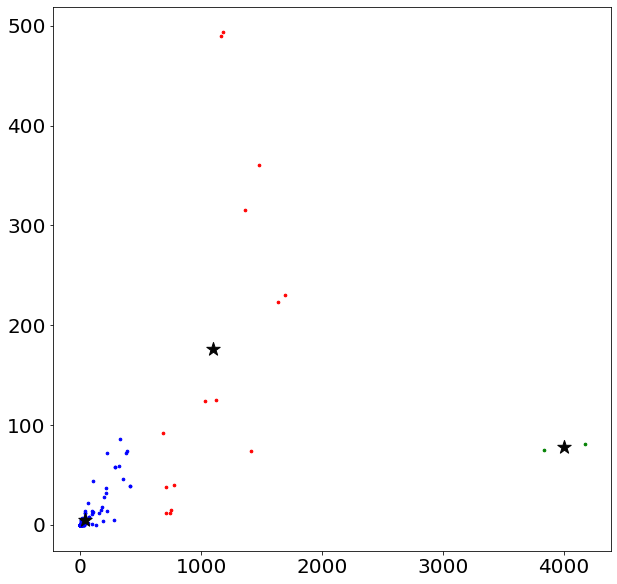

In [32]:
#Set 3
# Getting the data points and plotting it
f1=dt2013['Total cases for trial during the year'].values
f2=dt2013['Cases in which trials were completed'].values
X = np.array(list(zip(f1, f2)))
#show scatter plot and add labels and title
plt.scatter(f1, f2, c='black', s=7)
plt.xlabel("Total cases for trial during the year")
plt.ylabel("Cases in which trials were completed")  
plt.title("K Means for Dataset of 2013(Set 3)")

#K-Means for a subset of Dataset 2013
kmeans(3,f1,f2)

Initial Centroids
[[ 246  235]
 [ 783  234]
 [3712   76]]


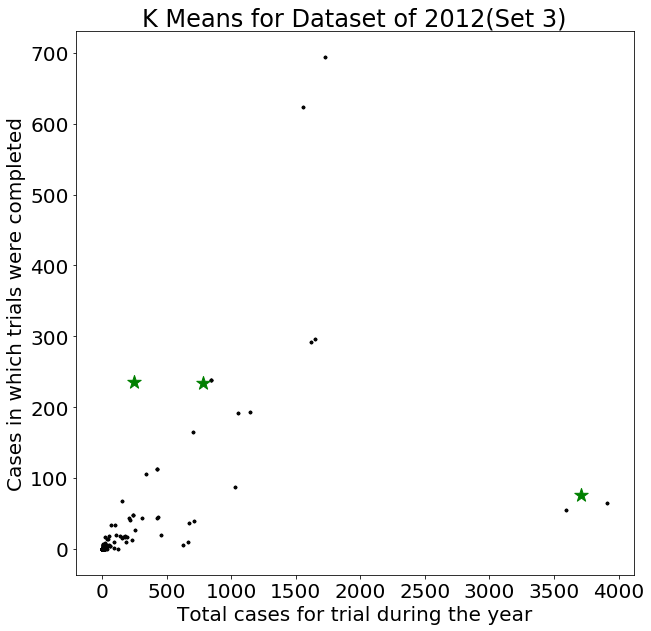

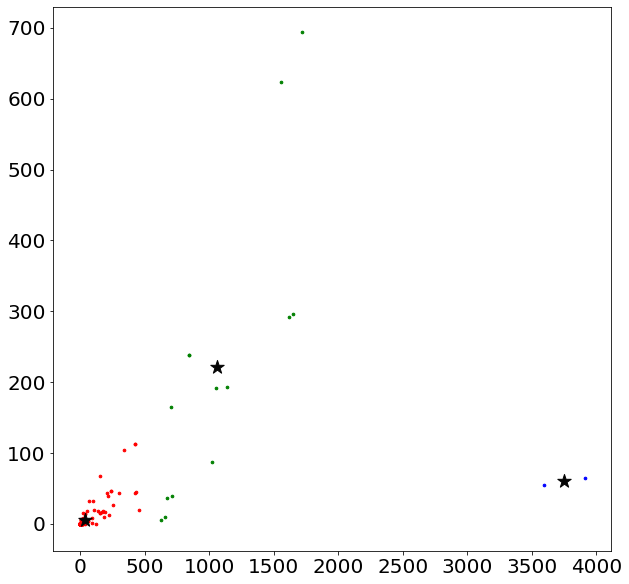

In [46]:
#Set 3
# Getting the data points and plotting it
f1=dt2012['Total cases for trial during the year'].values
f2=dt2012['Cases in which trials were completed'].values
X = np.array(list(zip(f1, f2)))
#show scatter plot and add labels and title
plt.scatter(f1, f2, c='black', s=7)
plt.xlabel("Total cases for trial during the year")
plt.ylabel("Cases in which trials were completed")  
plt.title("K Means for Dataset of 2012(Set 3)")

#K-Means for a subset of Dataset 2012
kmeans(3,f1,f2)